In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import numpy as np

In [ ]:
df=pd.read_csv('/content/sentiment_dataset (2) (2).csv',encoding="latin-1")
df

,val,id,timestamp,query,username,tweet
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
...,...,...,...,...,...,...
7546,0,1469867444,Tue Apr 07 07:39:15 PDT 2009,NO_QUERY,BecauseShesStar,UPS trackers are really niffty. My phone is in...
7547,0,1469867488,Tue Apr 07 07:39:16 PDT 2009,NO_QUERY,jenjens31,another long day today is it friday yet??!
7548,0,1469867507,Tue Apr 07 07:39:16 PDT 2009,NO_QUERY,brandonb667,that hurt my feelings *B-Unit*
7549,0,1469867516,Tue Apr 07 07:39:17 PDT 2009,NO_QUERY,JoshODonald,@kyndoll yo yo happy birthday! wish it was my ...


In [ ]:
df1=df.loc[:4000]
df1.shape

(4001, 6)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7551 entries, 0 to 7550
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   val        7551 non-null   int64 
 1   id         7551 non-null   int64 
 2   timestamp  7550 non-null   object
 3   query      7550 non-null   object
 4   username   7550 non-null   object
 5   tweet      7550 non-null   object
dtypes: int64(2), object(4)
memory usage: 354.1+ KB


In [ ]:
df.isnull().sum()

val          0
id           0
timestamp    1
query        1
username     1
tweet        1
dtype: int64

In [ ]:
for i in df.select_dtypes('object').columns:
    df[i]=df[i].fillna(df[i].mode()[0])

In [ ]:
df.isnull().sum()

val          0
id           0
timestamp    0
query        0
username     0
tweet        0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.describe()

,val,id
count,7551.0,7.551000e+03
mean,0.0,1.468529e+09
std,0.0,1.691124e+07
min,0.0,1.460000e+02
25%,0.0,1.468256e+09
50%,0.0,1.468674e+09
75%,0.0,1.469150e+09
max,0.0,1.469868e+09


In [ ]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.tokenize import word_tokenize
nltk.download('vader_lexicon')
nltk.download('punkt')


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
df1.shape

(4001, 6)

In [ ]:
def tweet_sentiment(tweet):
    sid = SentimentIntensityAnalyzer()
    tokens = word_tokenize(tweet)
    text = ' '.join(tokens)
    sentiment_scores = sid.polarity_scores(text)
    score = sentiment_scores['compound']
    if score >= 0.05:
        sentiment = 'Positive'
    elif score <= -0.05:
        sentiment = 'Negative'
    else:
        sentiment = 'Neutral'

    return sentiment
df1['Sentiment'] = df1['tweet'].apply(tweet_sentiment)


KeyboardInterrupt: 

In [ ]:
df1['Sentiment'].isnull().sum()
df['Sentiment']=None

In [ ]:
df2=df.loc[4001:]

(3550, 7)

In [ ]:
df3 = pd.concat([df1, df2], ignore_index=True)

In [ ]:
df3

,val,id,timestamp,query,username,tweet,Sentiment
0,0,1467810369,-1.739607,0,-0.545146,-0.595284,0
1,0,1467810672,-1.739083,0,1.254859,1.261579,0
2,0,1467810917,-1.738559,0,0.770242,-1.496124,2
3,0,1467811184,-1.738034,0,-1.400821,1.394934,0
4,0,1467811193,-1.738034,0,-1.180676,-0.768646,0
...,...,...,...,...,...,...,...
7546,0,1469867444,1.676269,0,-1.603035,0.618712,0
7547,0,1469867488,1.676793,0,0.380258,0.796213,0
7548,0,1469867507,1.676793,0,-0.271708,1.555421,0
7549,0,1469867516,1.677317,0,-1.204085,-0.893725,0


In [ ]:
df3.isnull().sum()

val             0
id              0
timestamp       0
query           0
username        0
tweet           0
Sentiment    3550
dtype: int64

In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7551 entries, 0 to 7550
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   val        7551 non-null   int64 
 1   id         7551 non-null   int64 
 2   timestamp  7551 non-null   object
 3   query      7551 non-null   object
 4   username   7551 non-null   object
 5   tweet      7551 non-null   object
 6   Sentiment  7551 non-null   object
dtypes: int64(2), object(5)
memory usage: 413.1+ KB


In [ ]:
for i in df3.select_dtypes('object').columns:
    df3[i]=df3[i].fillna(df3[i].mode()[0])

In [ ]:
encoder = LabelEncoder()
col = ['timestamp','query','username','tweet','Sentiment']
for i in col:
  df3[i] = encoder.fit_transform(df3[i])
df3['Sentiment'].unique()

array([0, 2, 1])

In [ ]:
df3.describe()

,val,id,timestamp,query,username,tweet,Sentiment
count,7551.0,7.551000e+03,7551.000000,7551.0,7.551000e+03,7.551000e+03,7551.000000
mean,0.0,1.468529e+09,0.000000,0.0,6.586941e-18,1.505587e-17,0.459277
std,0.0,1.691124e+07,1.000066,0.0,1.000066e+00,1.000066e+00,0.754082
min,0.0,1.460000e+02,-1.739607,0.0,-1.725559e+00,-1.733406e+00,0.000000
25%,0.0,1.468256e+09,-0.873843,0.0,-8.626619e-01,-8.654442e-01,0.000000
50%,0.0,1.468674e+09,0.018133,0.0,2.725074e-03,6.778040e-04,0.000000
75%,0.0,1.469150e+09,0.879703,0.0,8.676140e-01,8.658801e-01,1.000000
max,0.0,1.469868e+09,1.677317,0.0,1.734495e+00,1.731542e+00,2.000000


In [ ]:
from scipy.stats import zscore
col = ['timestamp','username','tweet']
for i in col:
  df3[i]=zscore(df3[i])

In [ ]:
df.shape

(7551, 7)

In [ ]:
df3.drop(['query','val'],inplace=True,axis=1)

In [ ]:
df3

,id,timestamp,username,tweet,Sentiment
0,1467810369,-1.739607,-0.545146,-0.595284,0
1,1467810672,-1.739083,1.254859,1.261579,0
2,1467810917,-1.738559,0.770242,-1.496124,2
3,1467811184,-1.738034,-1.400821,1.394934,0
4,1467811193,-1.738034,-1.180676,-0.768646,0
...,...,...,...,...,...
7546,1469867444,1.676269,-1.603035,0.618712,0
7547,1469867488,1.676793,0.380258,0.796213,0
7548,1469867507,1.676793,-0.271708,1.555421,0
7549,1469867516,1.677317,-1.204085,-0.893725,0


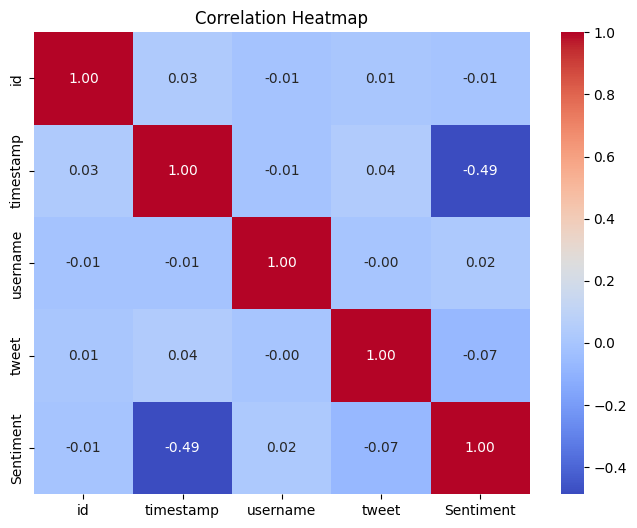

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(df3.corr(), annot=True, cmap='coolwarm' ,fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
selected_features =['timestamp','username','tweet']
X = df3[selected_features]
y = df3['Sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = SVC(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.6882859033752482

Classification Report:
              precision    recall  f1-score   support

           0       0.69      1.00      0.82      1041
           1       0.00      0.00      0.00       202
           2       0.40      0.01      0.03       268

    accuracy                           0.69      1511
   macro avg       0.36      0.34      0.28      1511
weighted avg       0.55      0.69      0.57      1511



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
